In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *

In [2]:
data = pd.read_csv('DataSets/BreastCancer.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

# Cost Function

In [4]:
def costFunction(w, b, x, y):
    temp = 0.0
    for i in range(len(x)):
        temp = temp - (y[i]*(log(sigmoid(np.dot(x[i], w)+b))) + (1-y[i])*log(1-sigmoid(np.dot(x[i], w)+b)))
    return temp/len(x)

# Gradient Decent

In [5]:
def gradientDecent(w, b, x, y, alpha):
    tempW = np.zeros(len(w), dtype=np.float64)
    for j in range(len(x[0])):
        for i in range(len(x)):
            tempW[j] += (sigmoid(np.dot(w, x[i])+b)-y[i])*x[i][j]
    tempW = tempW/len(x)
    tempB = 0.0
    for i in range(len(x)):
        tempB += np.dot(w, x[i])+b-y[i]
    tempB = tempB/len(x)
    w = w-alpha*tempW
    b = b-alpha*tempB
    return w, b

In [6]:
def logisticRegression(x, y, alpha=1e-3):
    w = np.zeros(len(x[0]), dtype=np.float64)
    b = 0.0
    cost = 0.0
    costList = []
    itrList = []
    itr = 1
    while True:
        cost = costFunction(w, b, x, y)
        w, b = gradientDecent(w, b, x, y, alpha)
        costList.append(cost)
        itrList.append(itr)
        if itr==500:
            break
        itr+=1
    return costList, itrList

In [7]:
x = data.iloc[:, 2:-1]
y = []
for q in data.iloc[:, 1]:
    if q=='M':
        y.append(0.0)
    else:
        y.append(1.0)
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [14]:
a, c = logisticRegression(x, y, alpha=3*1e-6)

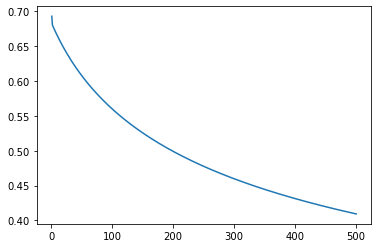

In [16]:
plt.plot(c, a)
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/home/krakenmare/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.951048951048951